In [ ]:
from google.colab import files
import os

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mohammedsarim","key":"fc5b1fa260ef578209dcea095eac25c0"}'}

In [ ]:
os.environ["KAGGLE_CONFIG_DIR"] = "/content"

In [ ]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

 99% 2.27G/2.29G [00:12<00:00, 227MB/s]
100% 2.29G/2.29G [00:12<00:00, 197MB/s]


In [ ]:
!unzip \*.zip

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0448-0001.jpeg  
  inflating: ches

In [ ]:
import numpy as np 
import pandas as pd
for dirname, _, filenames in os.walk('chest_xray'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Streaming output truncated to the last 5000 lines.
chest_xray/train/PNEUMONIA/person819_bacteria_2730.jpeg
chest_xray/train/PNEUMONIA/person438_bacteria_1892.jpeg
chest_xray/train/PNEUMONIA/person1203_bacteria_3154.jpeg
chest_xray/train/PNEUMONIA/person1544_bacteria_4033.jpeg
chest_xray/train/PNEUMONIA/person1044_virus_1740.jpeg
chest_xray/train/PNEUMONIA/person371_bacteria_1701.jpeg
chest_xray/train/PNEUMONIA/person423_bacteria_1855.jpeg
chest_xray/train/PNEUMONIA/person841_virus_1481.jpeg
chest_xray/train/PNEUMONIA/person8_bacteria_37.jpeg
chest_xray/train/PNEUMONIA/person1_bacteria_1.jpeg
chest_xray/train/PNEUMONIA/person480_bacteria_2038.jpeg
chest_xray/train/PNEUMONIA/person534_virus_1061.jpeg
chest_xray/train/PNEUMONIA/person441_bacteria_1903.jpeg
chest_xray/train/PNEUMONIA/person516_bacteria_2192.jpeg
chest_xray/train/PNEUMONIA/person1751_bacteria_4592.jpeg
chest_xray/train/PNEUMONIA/person533_virus_1055.jpeg
chest_xray/train/PNEUMONIA/person992_bacteria_2919.jpeg
chest_xray/tra

In [ ]:
train_norm = "/content/chest_xray/train/NORMAL"
train_pneu = "/content/chest_xray/train/PNEUMONIA"
val_norm = "/content/chest_xray/val/NORMAL"
val_pneu = "/content/chest_xray/val/PNEUMONIA"
test_norm = "/content/chest_xray/test/NORMAL"
test_pneu = "/content/chest_xray/test/PNEUMONIA"

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
infected_images = []
for file in os.listdir(train_pneu):
    img = Image.open(os.path.join(train_pneu, file)).convert('L')
    img = img.resize((36,36))
    img = np.asarray(img)
    infected_images.append(img)

In [ ]:
for file in os.listdir(val_pneu):
    img = Image.open(os.path.join(val_pneu, file)).convert('L')
    img = img.resize((36,36))
    img = np.asarray(img)
    infected_images.append(img)

In [ ]:
print(len(infected_images))

3883


In [ ]:
normal_images = []
for file in os.listdir(train_norm):
    img = Image.open(os.path.join(train_norm, file)).convert('L')
    img = img.resize((36,36))
    img = np.asarray(img)
    normal_images.append(img)

In [ ]:
for file in os.listdir(val_norm):
    img = Image.open(os.path.join(val_norm, file)).convert('L')
    img = img.resize((36,36))
    img = np.asarray(img)
    normal_images.append(img)

In [ ]:
print(len(normal_images))

1349


In [ ]:
X_train = np.asarray(infected_images + normal_images)
y_train = np.asarray([1 for _ in range(len(infected_images))] + [0 for _ in range(len(normal_images))])

In [ ]:
print(X_train.shape)
print(y_train.shape)

X_train = X_train.reshape((5232, 36, 36,1))
print(X_train.shape)
print(y_train.shape)

(5232, 36, 36)
(5232,)
(5232, 36, 36, 1)
(5232,)


In [ ]:
test_infected_images = []
for file in os.listdir(test_pneu):
    img = Image.open(os.path.join(test_pneu, file)).convert('L')
    img = img.resize((36,36))
    img = np.asarray(img)
    test_infected_images.append(img)

In [ ]:
test_normal_images = []
for file in os.listdir(test_norm):
    img = Image.open(os.path.join(test_norm, file)).convert('L')
    img = img.resize((36,36))
    img = np.asarray(img)
    test_normal_images.append(img)

In [ ]:
X_test = np.asarray(test_infected_images + test_normal_images)
y_test = np.asarray([1 for _ in range(len(test_infected_images))] + [0 for _ in range(len(test_normal_images))])

In [ ]:
print(X_test.shape)
print(y_test.shape)

X_test = X_test.reshape((624, 36, 36,1))
print(X_test.shape)
print(y_test.shape)

(624, 36, 36)
(624,)
(624, 36, 36, 1)
(624,)


In [ ]:
X = np.asarray(infected_images + test_infected_images + normal_images + test_normal_images)
y = np.asarray([1 for _ in range(len(infected_images)+len(test_infected_images))] + [0 for _ in range(len(test_normal_images)+len(normal_images))])

In [ ]:
print(X.shape)
print(y.shape)
X = X.reshape((5856, 36, 36, 1))
print(X.shape)
print(y.shape)

(5856, 36, 36)
(5856,)
(5856, 36, 36, 1)
(5856,)


In [ ]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(y, num_classes = 2)

In [ ]:
from sklearn.utils import shuffle

In [ ]:
X, y = shuffle(X, y)
X = X / 255.0

[1. 0.]


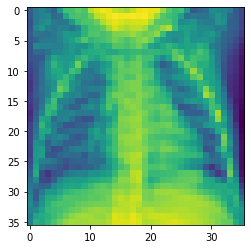

[0. 1.]


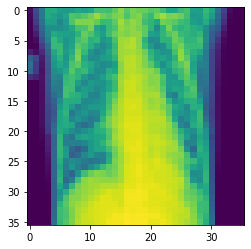

[0. 1.]


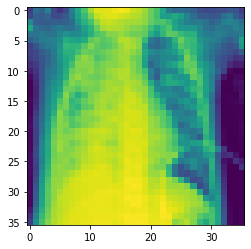

[0. 1.]


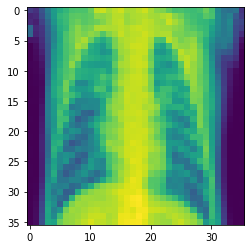

[0. 1.]


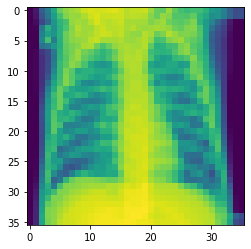

[0. 1.]


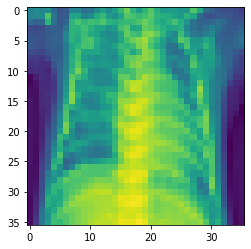

[0. 1.]


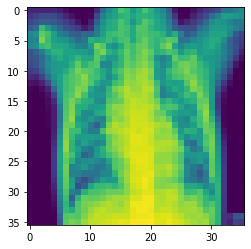

[0. 1.]


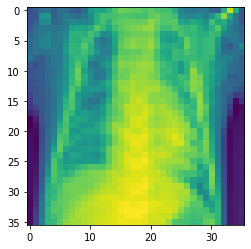

[0. 1.]


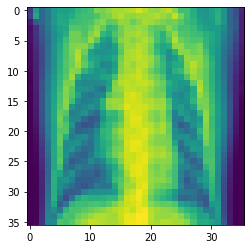

[0. 1.]


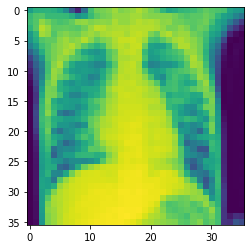

In [ ]:
for i in range(10):
    print(y[i])
    plt.imshow(X[i].reshape((36, 36)))
    plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
print("Train size:", X_train.shape, y_train.shape)
print("Test size:", X_test.shape, y_test.shape)

Train size: (4684, 36, 36, 1) (4684, 2)
Test size: (1172, 36, 36, 1) (1172, 2)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten,BatchNormalization
from keras.layers import Conv2D,MaxPooling2D

In [ ]:
model = Sequential()

model.add(Conv2D(64, (3,3), activation='relu', input_shape = X_train.shape[1:]))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(256, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(256, activation='relu'))

model.add(Dense(2, activation='softmax'))

In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test), verbose = 1)

Epoch 1/15
147/147 [==============================] - 15s 12ms/step - loss: 0.3477 - accuracy: 0.8841 - val_loss: 1.7320 - val_accuracy: 0.7338
Epoch 2/15
147/147 [==============================] - 1s 8ms/step - loss: 0.1778 - accuracy: 0.9330 - val_loss: 2.8434 - val_accuracy: 0.7338
Epoch 3/15
147/147 [==============================] - 1s 8ms/step - loss: 0.1405 - accuracy: 0.9443 - val_loss: 0.5521 - val_accuracy: 0.8089
Epoch 4/15
147/147 [==============================] - 1s 8ms/step - loss: 0.1316 - accuracy: 0.9479 - val_loss: 0.2616 - val_accuracy: 0.9010
Epoch 5/15
147/147 [==============================] - 1s 8ms/step - loss: 0.1075 - accuracy: 0.9594 - val_loss: 0.2959 - val_accuracy: 0.8771
Epoch 6/15
147/147 [==============================] - 1s 8ms/step - loss: 0.0943 - accuracy: 0.9648 - val_loss: 0.9804 - val_accuracy: 0.5887
Epoch 7/15
147/147 [==============================] - 1s 8ms/step - loss: 0.0912 - accuracy: 0.9667 - val_loss: 0.2392 - val_accuracy: 0.9155
Epoc

In [ ]:
pred = [np.argmax(i) for i in model.predict(X_test)]
pred[:5]

37/37 [==============================] - 0s 2ms/step


[1, 1, 1, 0, 0]

In [ ]:
tru = [np.argmax(i) for i in y_test]
from sklearn.metrics import confusion_matrix
confusion_matrix(tru, pred)

array([[291,  21],
       [ 31, 829]])

In [ ]:
model.save('pneumonia2.h5')